
In this notebook, You will do amazon review classification with BERT.[Download data from [this](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) link]
<pre>


In [ ]:
#all imports
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [ ]:
tf.test.gpu_device_name()

''

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [ ]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv("Reviews.csv")
#reviews.to_frame()
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
type(reviews['Score'])

pandas.core.series.Series

In [ ]:
text = []
score = []
for i, row in reviews.iterrows():
  text.append(row['Text'])
  score.append(str(row['Score']))


In [ ]:
type(score)

list

In [ ]:
data = {'Text':reviews['Text'],'Score':score}

text_data = pd.DataFrame(data ,columns=['Text','Score'] )

text_data.head(1)

,Text,Score
0,I have bought several of the Vitality canned d...,5


In [ ]:
data = {'Text':reviews['Text'].astype(str) ,'Score':reviews['Score'].astype(int)}

text_data = pd.DataFrame(data ,columns=['Text','Score'] )

text_data.head(1)

,Text,Score
0,I have bought several of the Vitality canned d...,5


In [ ]:
#Droping nan datapoints from DataFrame
text_data = text_data.dropna()

# check if we have any nan values are there
print(text_data.isnull().values.any())
print("number of nan values",text_data.isnull().values.sum())

False
number of nan values 0


In [ ]:
reviews = text_data[text_data['Score'] != 3]

#text_data = reviews['Text']
#score_data = reviews['Score']
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows.
reviews.shape
#text_data.Score.value_counts()

(525814, 2)

In [ ]:
d= reviews['Score'].apply(lambda x: 1 if x > 3 else 0)
reviews['Score'] = d
reviews.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [ ]:
reviews.Score.value_counts()

1    443777
0     82037
Name: Score, dtype: int64

In [ ]:
from random import sample
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]

reviews = reviews.sample(n=100000, random_state=30)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
reviews.shape

(100000, 3)

In [ ]:
text_data = reviews['Text']
print(text_data)


64117     The tea was of great quality and it tasted lik...
418112    My cat loves this.  The pellets are nice and s...
357829    Great product. Does not completely get rid of ...
175872    This gum is my favorite!  I would advise every...
178716    I also found out about this product because of...
                                ...                        
336657    Using this coffee and a stove top espresso mak...
498034    THE TASTE OF THIS M&M IS THE BEST. I USED IT I...
357766    Excellent Tea. I enjoy a cup every now and the...
326811    These oatmeal cookies have a great spice taste...
19261     This is the best coffee ever! I will never dri...
Name: Text, Length: 100000, dtype: object


In [ ]:
#https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

reviews['Text'] = [cleanhtml(i) for i in reviews['Text']]
reviews['Text'].head(5)

64117     The tea was of great quality and it tasted lik...
418112    My cat loves this.  The pellets are nice and s...
357829    Great product. Does not completely get rid of ...
175872    This gum is my favorite!  I would advise every...
178716    I also found out about this product because of...
Name: Text, dtype: object

In [ ]:
#remove HTML from the Text column and save in the Text column only

In [ ]:
#print head 5

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(reviews['Text'], reviews['Score'], test_size=0.2, stratify=reviews['Score'],random_state = 33)

In [ ]:
#split the data into train and test data(20%) with Stratify sampling, random state 33,

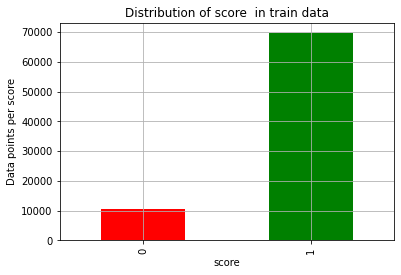

In [ ]:
import matplotlib.pyplot as plt
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar',color=my_colors)
plt.xlabel('score')
plt.ylabel('Data points per score')
plt.title('Distribution of score  in train data')
plt.grid()
plt.show()


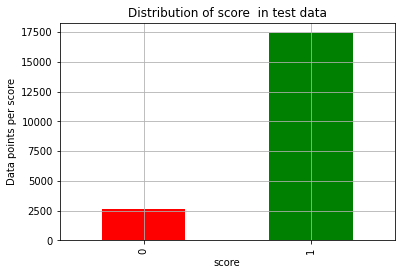

In [ ]:
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
test_class_distribution.plot(kind='bar',color=my_colors)
plt.xlabel('score')
plt.ylabel('Data points per score')
plt.title('Distribution of score  in test data')
plt.grid()
plt.show()

In [ ]:
#plot bar graphs of y_train and y_test

In [ ]:
#saving to disk. if we need, we can load preprocessed data directly.
reviews.to_csv('preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font>

If you want to know more about BERT, You can watch live sessions on Transformers and BERt.
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>.
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [ ]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0.
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out.
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [ ]:
bert_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
bert_model.output

<tf.Tensor 'keras_layer/StatefulPartitionedCall:0' shape=(None, 768) dtype=float32>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [ ]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
# coding=utf-8
# Copyright 2019 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Tokenization classes implementation.

The file is forked from:
https://github.com/google-research/bert/blob/master/tokenization.py.
"""
!pip install sentencepiece
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import re
import unicodedata

import six
import tensorflow as tf

import sentencepiece as spm

SPIECE_UNDERLINE = "▁"


def validate_case_matches_checkpoint(do_lower_case, init_checkpoint):
  """Checks whether the casing config is consistent with the checkpoint name."""

  # The casing has to be passed in by the user and there is no explicit check
  # as to whether it matches the checkpoint. The casing information probably
  # should have been stored in the bert_config.json file, but it's not, so
  # we have to heuristically detect it to validate.

  if not init_checkpoint:
    return

  m = re.match("^.*?([A-Za-z0-9_-]+)/bert_model.ckpt", init_checkpoint)
  if m is None:
    return

  model_name = m.group(1)

  lower_models = [
      "uncased_L-24_H-1024_A-16", "uncased_L-12_H-768_A-12",
      "multilingual_L-12_H-768_A-12", "chinese_L-12_H-768_A-12"
  ]

  cased_models = [
      "cased_L-12_H-768_A-12", "cased_L-24_H-1024_A-16",
      "multi_cased_L-12_H-768_A-12"
  ]

  is_bad_config = False
  if model_name in lower_models and not do_lower_case:
    is_bad_config = True
    actual_flag = "False"
    case_name = "lowercased"
    opposite_flag = "True"

  if model_name in cased_models and do_lower_case:
    is_bad_config = True
    actual_flag = "True"
    case_name = "cased"
    opposite_flag = "False"

  if is_bad_config:
    raise ValueError(
        "You passed in `--do_lower_case=%s` with `--init_checkpoint=%s`. "
        "However, `%s` seems to be a %s model, so you "
        "should pass in `--do_lower_case=%s` so that the fine-tuning matches "
        "how the model was pre-training. If this error is wrong, please "
        "just comment out this check." %
        (actual_flag, init_checkpoint, model_name, case_name, opposite_flag))


def convert_to_unicode(text):
  """Converts `text` to Unicode (if it's not already), assuming utf-8 input."""
  if six.PY3:
    if isinstance(text, str):
      return text
    elif isinstance(text, bytes):
      return text.decode("utf-8", "ignore")
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  elif six.PY2:
    if isinstance(text, str):
      return text.decode("utf-8", "ignore")
    elif isinstance(text, unicode):
      return text
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  else:
    raise ValueError("Not running on Python2 or Python 3?")


def printable_text(text):
  """Returns text encoded in a way suitable for print or `tf.logging`."""

  # These functions want `str` for both Python2 and Python3, but in one case
  # it's a Unicode string and in the other it's a byte string.
  if six.PY3:
    if isinstance(text, str):
      return text
    elif isinstance(text, bytes):
      return text.decode("utf-8", "ignore")
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  elif six.PY2:
    if isinstance(text, str):
      return text
    elif isinstance(text, unicode):
      return text.encode("utf-8")
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  else:
    raise ValueError("Not running on Python2 or Python 3?")


def load_vocab(vocab_file):
  """Loads a vocabulary file into a dictionary."""
  vocab = collections.OrderedDict()
  index = 0
  with tf.io.gfile.GFile(vocab_file, "r") as reader:
    while True:
      token = convert_to_unicode(reader.readline())
      if not token:
        break
      token = token.strip()
      vocab[token] = index
      index += 1
  return vocab


def convert_by_vocab(vocab, items):
  """Converts a sequence of [tokens|ids] using the vocab."""
  output = []
  for item in items:
    output.append(vocab[item])
  return output


def convert_tokens_to_ids(vocab, tokens):
  return convert_by_vocab(vocab, tokens)


def convert_ids_to_tokens(inv_vocab, ids):
  return convert_by_vocab(inv_vocab, ids)


def whitespace_tokenize(text):
  """Runs basic whitespace cleaning and splitting on a piece of text."""
  text = text.strip()
  if not text:
    return []
  tokens = text.split()
  return tokens


class FullTokenizer(object):
  """Runs end-to-end tokenziation."""

  def __init__(self, vocab_file, do_lower_case=True, split_on_punc=True):
    self.vocab = load_vocab(vocab_file)
    self.inv_vocab = {v: k for k, v in self.vocab.items()}
    self.basic_tokenizer = BasicTokenizer(
        do_lower_case=do_lower_case, split_on_punc=split_on_punc)
    self.wordpiece_tokenizer = WordpieceTokenizer(vocab=self.vocab)

  def tokenize(self, text):
    split_tokens = []
    for token in self.basic_tokenizer.tokenize(text):
      for sub_token in self.wordpiece_tokenizer.tokenize(token):
        split_tokens.append(sub_token)

    return split_tokens

  def convert_tokens_to_ids(self, tokens):
    return convert_by_vocab(self.vocab, tokens)

  def convert_ids_to_tokens(self, ids):
    return convert_by_vocab(self.inv_vocab, ids)


class BasicTokenizer(object):
  """Runs basic tokenization (punctuation splitting, lower casing, etc.)."""

  def __init__(self, do_lower_case=True, split_on_punc=True):
    """Constructs a BasicTokenizer.

    Args:
      do_lower_case: Whether to lower case the input.
      split_on_punc: Whether to apply split on punctuations. By default BERT
        starts a new token for punctuations. This makes detokenization difficult
        for tasks like seq2seq decoding.
    """
    self.do_lower_case = do_lower_case
    self.split_on_punc = split_on_punc

  def tokenize(self, text):
    """Tokenizes a piece of text."""
    text = convert_to_unicode(text)
    text = self._clean_text(text)

    # This was added on November 1st, 2018 for the multilingual and Chinese
    # models. This is also applied to the English models now, but it doesn't
    # matter since the English models were not trained on any Chinese data
    # and generally don't have any Chinese data in them (there are Chinese
    # characters in the vocabulary because Wikipedia does have some Chinese
    # words in the English Wikipedia.).
    text = self._tokenize_chinese_chars(text)

    orig_tokens = whitespace_tokenize(text)
    split_tokens = []
    for token in orig_tokens:
      if self.do_lower_case:
        token = token.lower()
        token = self._run_strip_accents(token)
      if self.split_on_punc:
        split_tokens.extend(self._run_split_on_punc(token))
      else:
        split_tokens.append(token)

    output_tokens = whitespace_tokenize(" ".join(split_tokens))
    return output_tokens

  def _run_strip_accents(self, text):
    """Strips accents from a piece of text."""
    text = unicodedata.normalize("NFD", text)
    output = []
    for char in text:
      cat = unicodedata.category(char)
      if cat == "Mn":
        continue
      output.append(char)
    return "".join(output)

  def _run_split_on_punc(self, text):
    """Splits punctuation on a piece of text."""
    chars = list(text)
    i = 0
    start_new_word = True
    output = []
    while i < len(chars):
      char = chars[i]
      if _is_punctuation(char):
        output.append([char])
        start_new_word = True
      else:
        if start_new_word:
          output.append([])
        start_new_word = False
        output[-1].append(char)
      i += 1

    return ["".join(x) for x in output]

  def _tokenize_chinese_chars(self, text):
    """Adds whitespace around any CJK character."""
    output = []
    for char in text:
      cp = ord(char)
      if self._is_chinese_char(cp):
        output.append(" ")
        output.append(char)
        output.append(" ")
      else:
        output.append(char)
    return "".join(output)

  def _is_chinese_char(self, cp):
    """Checks whether CP is the codepoint of a CJK character."""
    # This defines a "chinese character" as anything in the CJK Unicode block:
    #   https://en.wikipedia.org/wiki/CJK_Unified_Ideographs_(Unicode_block)
    #
    # Note that the CJK Unicode block is NOT all Japanese and Korean characters,
    # despite its name. The modern Korean Hangul alphabet is a different block,
    # as is Japanese Hiragana and Katakana. Those alphabets are used to write
    # space-separated words, so they are not treated specially and handled
    # like the all of the other languages.
    if ((cp >= 0x4E00 and cp <= 0x9FFF) or  #
        (cp >= 0x3400 and cp <= 0x4DBF) or  #
        (cp >= 0x20000 and cp <= 0x2A6DF) or  #
        (cp >= 0x2A700 and cp <= 0x2B73F) or  #
        (cp >= 0x2B740 and cp <= 0x2B81F) or  #
        (cp >= 0x2B820 and cp <= 0x2CEAF) or
        (cp >= 0xF900 and cp <= 0xFAFF) or  #
        (cp >= 0x2F800 and cp <= 0x2FA1F)):  #
      return True

    return False

  def _clean_text(self, text):
    """Performs invalid character removal and whitespace cleanup on text."""
    output = []
    for char in text:
      cp = ord(char)
      if cp == 0 or cp == 0xfffd or _is_control(char):
        continue
      if _is_whitespace(char):
        output.append(" ")
      else:
        output.append(char)
    return "".join(output)


class WordpieceTokenizer(object):
  """Runs WordPiece tokenziation."""

  def __init__(self, vocab, unk_token="[UNK]", max_input_chars_per_word=200):
    self.vocab = vocab
    self.unk_token = unk_token
    self.max_input_chars_per_word = max_input_chars_per_word

  def tokenize(self, text):
    """Tokenizes a piece of text into its word pieces.

    This uses a greedy longest-match-first algorithm to perform tokenization
    using the given vocabulary.

    For example:
      input = "unaffable"
      output = ["un", "##aff", "##able"]

    Args:
      text: A single token or whitespace separated tokens. This should have
        already been passed through `BasicTokenizer.

    Returns:
      A list of wordpiece tokens.
    """

    text = convert_to_unicode(text)

    output_tokens = []
    for token in whitespace_tokenize(text):
      chars = list(token)
      if len(chars) > self.max_input_chars_per_word:
        output_tokens.append(self.unk_token)
        continue

      is_bad = False
      start = 0
      sub_tokens = []
      while start < len(chars):
        end = len(chars)
        cur_substr = None
        while start < end:
          substr = "".join(chars[start:end])
          if start > 0:
            substr = "##" + substr
          if substr in self.vocab:
            cur_substr = substr
            break
          end -= 1
        if cur_substr is None:
          is_bad = True
          break
        sub_tokens.append(cur_substr)
        start = end

      if is_bad:
        output_tokens.append(self.unk_token)
      else:
        output_tokens.extend(sub_tokens)
    return output_tokens


def _is_whitespace(char):
  """Checks whether `chars` is a whitespace character."""
  # \t, \n, and \r are technically control characters but we treat them
  # as whitespace since they are generally considered as such.
  if char == " " or char == "\t" or char == "\n" or char == "\r":
    return True
  cat = unicodedata.category(char)
  if cat == "Zs":
    return True
  return False


def _is_control(char):
  """Checks whether `chars` is a control character."""
  # These are technically control characters but we count them as whitespace
  # characters.
  if char == "\t" or char == "\n" or char == "\r":
    return False
  cat = unicodedata.category(char)
  if cat in ("Cc", "Cf"):
    return True
  return False


def _is_punctuation(char):
  """Checks whether `chars` is a punctuation character."""
  cp = ord(char)
  # We treat all non-letter/number ASCII as punctuation.
  # Characters such as "^", "$", and "`" are not in the Unicode
  # Punctuation class but we treat them as punctuation anyways, for
  # consistency.
  if ((cp >= 33 and cp <= 47) or (cp >= 58 and cp <= 64) or
      (cp >= 91 and cp <= 96) or (cp >= 123 and cp <= 126)):
    return True
  cat = unicodedata.category(char)
  if cat.startswith("P"):
    return True
  return False


def preprocess_text(inputs, remove_space=True, lower=False):
  """Preprocesses data by removing extra space and normalize data.

  This method is used together with sentence piece tokenizer and is forked from:
  https://github.com/google-research/google-research/blob/master/albert/tokenization.py

  Args:
    inputs: The input text.
    remove_space: Whether to remove the extra space.
    lower: Whether to lowercase the text.

  Returns:
    The preprocessed text.

  """
  outputs = inputs
  if remove_space:
    outputs = " ".join(inputs.strip().split())

  if six.PY2 and isinstance(outputs, str):
    try:
      outputs = six.ensure_text(outputs, "utf-8")
    except UnicodeDecodeError:
      outputs = six.ensure_text(outputs, "latin-1")

  outputs = unicodedata.normalize("NFKD", outputs)
  outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
  if lower:
    outputs = outputs.lower()

  return outputs


def encode_pieces(sp_model, text, sample=False):
  """Segements text into pieces.

  This method is used together with sentence piece tokenizer and is forked from:
  https://github.com/google-research/google-research/blob/master/albert/tokenization.py


  Args:
    sp_model: A spm.SentencePieceProcessor object.
    text: The input text to be segemented.
    sample: Whether to randomly sample a segmentation output or return a
      deterministic one.

  Returns:
    A list of token pieces.
  """
  if six.PY2 and isinstance(text, six.text_type):
    text = six.ensure_binary(text, "utf-8")

  if not sample:
    pieces = sp_model.EncodeAsPieces(text)
  else:
    pieces = sp_model.SampleEncodeAsPieces(text, 64, 0.1)
  new_pieces = []
  for piece in pieces:
    piece = printable_text(piece)
    if len(piece) > 1 and piece[-1] == "," and piece[-2].isdigit():
      cur_pieces = sp_model.EncodeAsPieces(piece[:-1].replace(
          SPIECE_UNDERLINE, ""))
      if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
        if len(cur_pieces[0]) == 1:
          cur_pieces = cur_pieces[1:]
        else:
          cur_pieces[0] = cur_pieces[0][1:]
      cur_pieces.append(piece[-1])
      new_pieces.extend(cur_pieces)
    else:
      new_pieces.append(piece)

  return new_pieces


def encode_ids(sp_model, text, sample=False):
  """Segments text and return token ids.

  This method is used together with sentence piece tokenizer and is forked from:
  https://github.com/google-research/google-research/blob/master/albert/tokenization.py

  Args:
    sp_model: A spm.SentencePieceProcessor object.
    text: The input text to be segemented.
    sample: Whether to randomly sample a segmentation output or return a
      deterministic one.

  Returns:
    A list of token ids.
  """
  pieces = encode_pieces(sp_model, text, sample=sample)
  ids = [sp_model.PieceToId(piece) for piece in pieces]
  return ids


class FullSentencePieceTokenizer(object):
  """Runs end-to-end sentence piece tokenization.

  The interface of this class is intended to keep the same as above
  `FullTokenizer` class for easier usage.
  """

  def __init__(self, sp_model_file):
    """Inits FullSentencePieceTokenizer.

    Args:
      sp_model_file: The path to the sentence piece model file.
    """
    self.sp_model = spm.SentencePieceProcessor()
    self.sp_model.Load(sp_model_file)
    self.vocab = {
        self.sp_model.IdToPiece(i): i
        for i in six.moves.range(self.sp_model.GetPieceSize())
    }

  def tokenize(self, text):
    """Tokenizes text into pieces."""
    return encode_pieces(self.sp_model, text)

  def convert_tokens_to_ids(self, tokens):
    """Converts a list of tokens to a list of ids."""
    return [self.sp_model.PieceToId(printable_text(token)) for token in tokens]

  def convert_ids_to_tokens(self, ids):
    """Converts a list of ids ot a list of tokens."""
    return [self.sp_model.IdToPiece(id_) for id_ in ids]

     |████████████████████████████████| 1.1MB 5.3MB/s 


In [ ]:
tokenizer = FullTokenizer(vocab_file, do_lower_case )

In [ ]:
#import tokenization - We have given tokenization.py file

In [ ]:
# Create tokenizer " Instantiate FullTokenizer"
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation

In [ ]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and

# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens.

# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)

# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)

# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'),
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask

# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)

# type of all the above arrays should be numpy arrays

# after execution of this cell, you have to get
# X_train_tokens, X_train_mask, X_train_segment
# X_test_tokens, X_test_mask, X_test_segment

In [ ]:
from keras.preprocessing import sequence
print('original sentence :\n' , np.array(X_train.values[0].split()))
print('number of words :',len(X_train.values[0].split()))
print('='*50)
max_seq_length = 55
tokens = tokenizer.tokenize(X_train.values[0])
tokens = tokens[0:(max_seq_length-2)]
tokens = ['[CLS]',*tokens,'[SEP]']
print('tokens are "\n', np.array(tokens))
print('='*50)
print('number of tokens :',len(tokens))
print('token replace with positional encoding :\n',np.array(tokenizer.convert_tokens_to_ids(tokens)))
print('='*50)
print('the mask array is ',np.array([1]*len(tokens) + [0]*(max_seq_length-len(tokens))))
print('='*50)
print('the sequence length is ',np.array([0]*max_seq_length))
print('='*50)
#X_train_encoded_essay = t.texts_to_sequences(X_train['essay'])
y = np.array(tokenizer.convert_tokens_to_ids(tokens))
z = [int(i) for i in y]

x = []
for i in range(max_seq_length):
  if i < len(z):
    x.append(int(z[i]))
  else:
    x.append(int(0))

print(x)


original sentence :
 ['I' 'had' 'never' 'tried' 'this' 'brand' 'before,' 'so' 'I' 'was'
 'worried' 'about' 'the' 'quality.' 'It' 'tasted' 'great.' 'A' 'very'
 'nice' 'smooth' 'rich' 'full' 'flavor.' 'Its' 'my' 'new' 'favoret.']
number of words : 28
tokens are "
 ['[CLS]' 'i' 'had' 'never' 'tried' 'this' 'brand' 'before' ',' 'so' 'i'
 'was' 'worried' 'about' 'the' 'quality' '.' 'it' 'tasted' 'great' '.' 'a'
 'very' 'nice' 'smooth' 'rich' 'full' 'flavor' '.' 'its' 'my' 'new'
 'favor' '##et' '.' '[SEP]']
number of tokens : 36
token replace with positional encoding :
 [  101  1045  2018  2196  2699  2023  4435  2077  1010  2061  1045  2001
  5191  2055  1996  3737  1012  2009 12595  2307  1012  1037  2200  3835
  5744  4138  2440 14894  1012  2049  2026  2047  5684  3388  1012   102]
the mask array is  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the sequence length is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

In [ ]:
max_seq_length = 55
def sen_to_token(data):
  Tokens , mask , sequence = list(), list(), list()
  for i in range(len(data)):
    tokens = tokenizer.tokenize(X_train.values[i])
    tokens = tokens[0:(max_seq_length-2)]
    tokens = ['[CLS]',*tokens,'[SEP]']
    tokenizer.convert_tokens_to_ids(tokens)
    y = np.array(tokenizer.convert_tokens_to_ids(tokens))
    z = [int(i) for i in y]
    x = []
    for i in range(max_seq_length):
      if i < len(z):
        x.append(int(z[i]))
      else:
        x.append(int(0))
    Tokens.append(np.array(x))

    mask.append(np.array([1]*len(tokens) + [0]*(max_seq_length-len(tokens))))
    sequence.append(np.array([0]*max_seq_length))

  return  np.array(Tokens) , np.array(mask) , np.array(sequence)



In [ ]:
X_train_tokens, X_train_mask, X_train_segment = sen_to_token(X_train)
X_test_tokens, X_test_mask, X_test_segment = sen_to_token(X_test)

In [ ]:
import pickle

In [ ]:

##save all your results to disk so that, no need to run all again.
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

In [ ]:
#you can load from disk
X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb'))
X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb'))

In [ ]:
def grader_alltokens_train():
    out = False

    if type(X_train_tokens) == np.ndarray:

        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)

        segment_temp = not np.any(X_train_segment)

        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)

        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]

        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]

        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep

    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

In [ ]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:

        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)

        segment_temp = not np.any(X_test_segment)

        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)

        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]

        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]

        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep

    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3.
We will utlize those two and will get the embeddings for each sentence in the
Train and test data.</pre>

In [ ]:
bert_model.input

[<tf.Tensor 'input_word_ids:0' shape=(None, 55) dtype=int32>,
 <tf.Tensor 'input_mask:0' shape=(None, 55) dtype=int32>,
 <tf.Tensor 'segment_ids:0' shape=(None, 55) dtype=int32>]

In [ ]:
bert_model.output

<tf.Tensor 'keras_layer/StatefulPartitionedCall:0' shape=(None, 768) dtype=float32>

In [ ]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
X_train_pooled_output=bert_model.predict([X_train_tokens[:100],X_train_mask[:100],X_train_segment[:100]])

In [ ]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output=bert_model.predict([X_test_tokens[:100],X_test_mask[:100],X_test_segment[:100]])

In [ ]:
##save all your results to disk so that, no need to run all again.
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

In [ ]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN.
1.<b> You have to use AUC as metric.</b>
2. You can use any architecture you want.
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs.
4. Print the loss and metric at every epoch.
5. You have to submit without overfitting and underfitting.
</pre>

In [ ]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
import os
import random as rn

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

inputs_essay = Input(shape=(768,), dtype='int32')

dense1 = Dense(500, activation='relu')(inputs_essay)

drop_out1 = Dropout(0.1)(dense1)

dense2 = Dense(20, activation='relu')(drop_out1)

drop_out2 = Dropout(0.1)(dense2)

dense3 = Dense(5, activation='relu')(drop_out2)

Out = Dense(units=2,activation='softmax')(dense3)

#Creating a model
model = Model(inputs_essay,outputs=Out)


In [ ]:
#compiling
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train, 2)[:100]
Y_test = tf.keras.utils.to_categorical(y_test, 2)[:100]

In [ ]:
model.fit(X_train_pooled_output,Y_train,epochs=2,validation_data=(X_test_pooled_output ,Y_test))

Epoch 1/2
4/4 [==============================] - 0s 43ms/step - loss: 0.5531 - accuracy: 0.7700 - val_loss: 0.3504 - val_accuracy: 0.8900
Epoch 2/2
4/4 [==============================] - 0s 7ms/step - loss: 0.4244 - accuracy: 0.8800 - val_loss: 0.3378 - val_accuracy: 0.8900


<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font>

1. Download data from <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a>
2. Read the csv file
3. Remove all the html tags
4. Now do tokenization [Part 3 as mentioned above]
    * Create tokens,mask array and segment array
5. Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
   * Print the shape of output(X_test.shape).You should get (352,768)
6. Predit the output of X_test with the Neural network model which we trained earlier.
7. Print the occurences of class labels in the predicted output

</pre>

In [ ]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv("test.csv")
#reviews.to_frame()
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [ ]:
#https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

reviews['Text'] = [cleanhtml(i) for i in reviews['Text']]
reviews['Text'].head(5)

0    Just opened Greenies Joint Care (individually ...
1    This product rocks :) My mom was very happy w/...
2    The product was fine, but the cost of shipping...
3    I love this soup. It's great as part of a meal...
4    Getting ready to order again. These are great ...
Name: Text, dtype: object

In [ ]:
X_train_tokens, X_train_mask, X_train_segment = sen_to_token(reviews['Text'])

In [ ]:
X_train_pooled_output=bert_model.predict([X_train_tokens[:100],X_train_mask[:100],X_train_segment[:100]])

In [ ]:
y_pred = model.predict(X_train_pooled_output)

In [ ]:
y_pred[0]

array([0.10036853, 0.89963144], dtype=float32)